# Raw Analytics - Diabetes Health Indicators

Analise de qualidade dos dados brutos da camada Bronze. 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Carregamento

In [11]:
plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")

df_raw = pd.read_csv('data_raw.csv')
df_raw_temp = df_raw.copy()

## 3. Análise Exploratória Com Gráficos

#### 3.1 Proporção das classes de Diabetes (Gráfico de Pizza)

A coluna Diabetes_012 é a variável alvo do nosso dataset, indicando se o indivíduo é não diabético, pré-diabético ou diabético. O gráfico de pizza nos mostra rapidamente se há desbalanceamento entre as classes.

Em bases desbalanceadas, modelos de classificação podem se tornar tendenciosos, priorizando a classe majoritária e reduzindo a capacidade de identificar corretamente as classes minoritárias.Por isso, essa análise é importante para avaliar a representatividade do dataset e decidir se será necessário aplicar técnicas de balanceamento antes da modelagem.

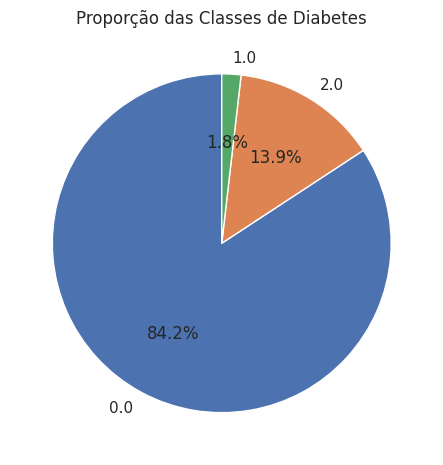

In [24]:
df_raw["Diabetes_012"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Proporção das Classes de Diabetes")
plt.ylabel("")
plt.show()


#### 3.2 Distribuição do BMI (Histograma + Linha de Densidade)

O gráfico de histograma com densidade apresenta a distribuição da variável BMI (Body Mass Index), que é um dos principais fatores de risco associados ao diabetes.Essa análise permite identificar onde os dados se concentram, se existem valores extremos (outliers) e qual é o formato da distribuição (simetria ou assimetria).

O histograma mostra a frequência dos valores em intervalos (bins), enquanto a curva de densidade (KDE) facilita a interpretação visual da forma da distribuição e ajuda a identificar tendências gerais.

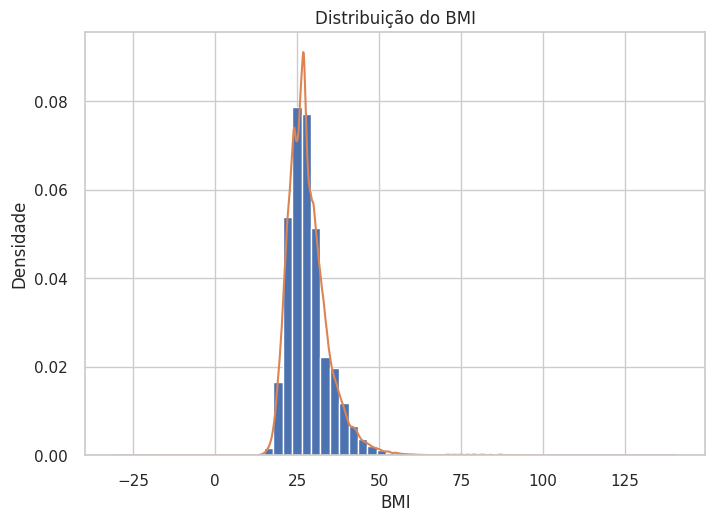

In [27]:
df_raw["BMI"].plot(kind="hist", bins=30, density=True)
df_raw["BMI"].plot(kind="kde")
plt.title("Distribuição do BMI")
plt.xlabel("BMI")
plt.ylabel("Densidade")
plt.show()


#### 3.3 Comparação de BMI por Diabetes (Boxplot)

O boxplot apresenta a distribuição do BMI (Body Mass Index) para cada classe da variável alvo Diabetes_012, permitindo comparar como o índice de massa corporal se comporta em pessoas não diabéticas, pré-diabéticas e diabéticas.

O objetivo dessa análise é observar diferenças na distribuição do BMI entre as classes, especialmente a mediana e os quartis, além da presença de outliers.Isso ajuda a entender se indivíduos com diabetes tendem a apresentar valores de BMI mais elevados, o que pode indicar uma relação entre obesidade e risco de diabetes.

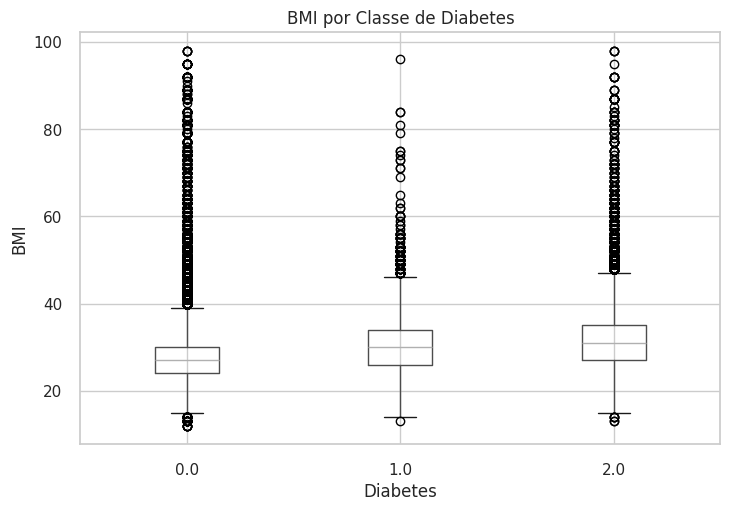

In [28]:
df_raw.boxplot(column="BMI", by="Diabetes_012")
plt.title("BMI por Classe de Diabetes")
plt.suptitle("")
plt.xlabel("Diabetes")
plt.ylabel("BMI")
plt.show()


#### Diabetes × Pressão Alta (Gráfico de Barras Empilhadas)

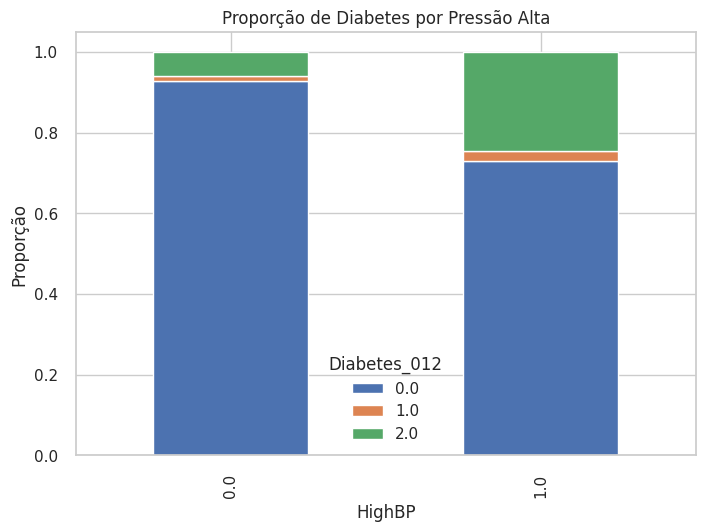

In [29]:
pd.crosstab(
    df_raw["HighBP"],
    df_raw["Diabetes_012"],
    normalize="index"
).plot(kind="bar", stacked=True)

plt.title("Proporção de Diabetes por Pressão Alta")
plt.xlabel("HighBP")
plt.ylabel("Proporção")
plt.show()


#### Idade × Diabetes (Gráfico de Área)

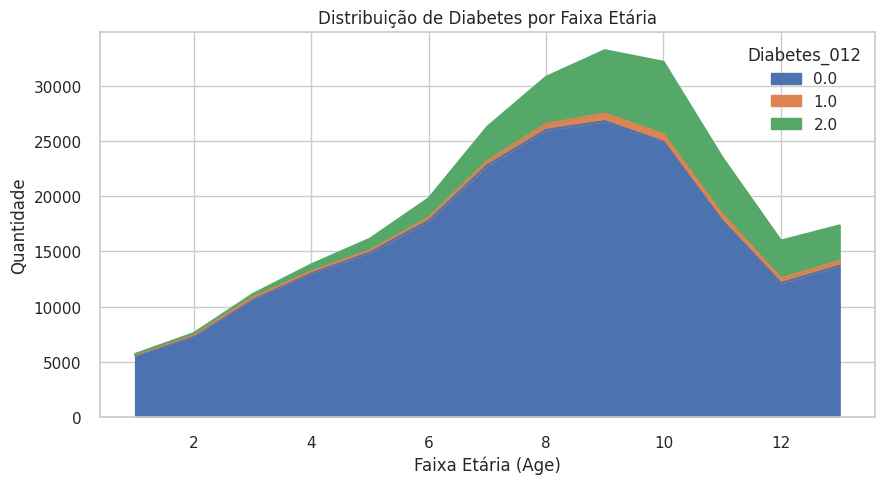

In [30]:
pd.crosstab(
    df_raw["Age"],
    df_raw["Diabetes_012"]
).plot(kind="area", stacked=True, figsize=(10,5))

plt.title("Distribuição de Diabetes por Faixa Etária")
plt.xlabel("Faixa Etária (Age)")
plt.ylabel("Quantidade")
plt.show()


#### Atividade Física × Diabetes (Gráfico de Barras Horizontais)

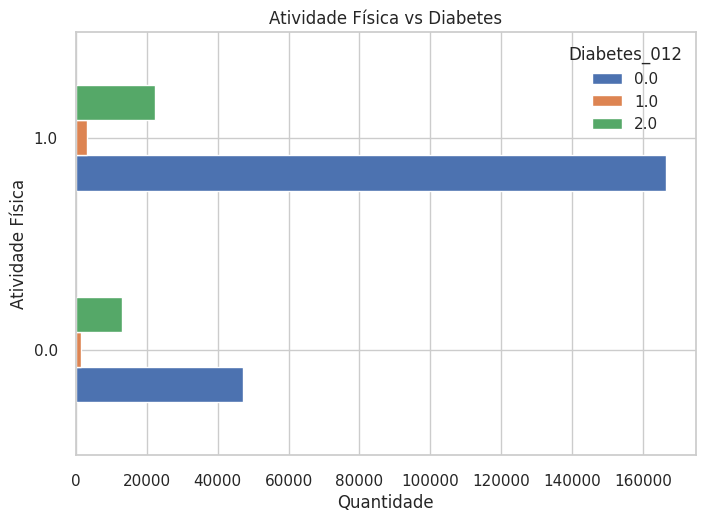

In [31]:
pd.crosstab(
    df_raw["PhysActivity"],
    df_raw["Diabetes_012"]
).plot(kind="barh")

plt.title("Atividade Física vs Diabetes")
plt.xlabel("Quantidade")
plt.ylabel("Atividade Física")
plt.show()


#### Saúde Geral (Gráfico de Linha)

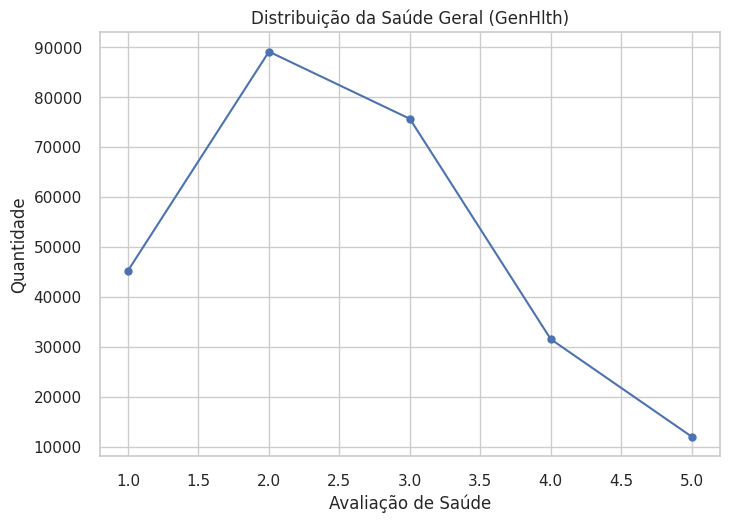

In [32]:
df_raw["GenHlth"].value_counts().sort_index().plot(kind="line", marker="o")

plt.title("Distribuição da Saúde Geral (GenHlth)")
plt.xlabel("Avaliação de Saúde")
plt.ylabel("Quantidade")
plt.show()


#### Saúde Mental × Saúde Física (Scatter Plot)

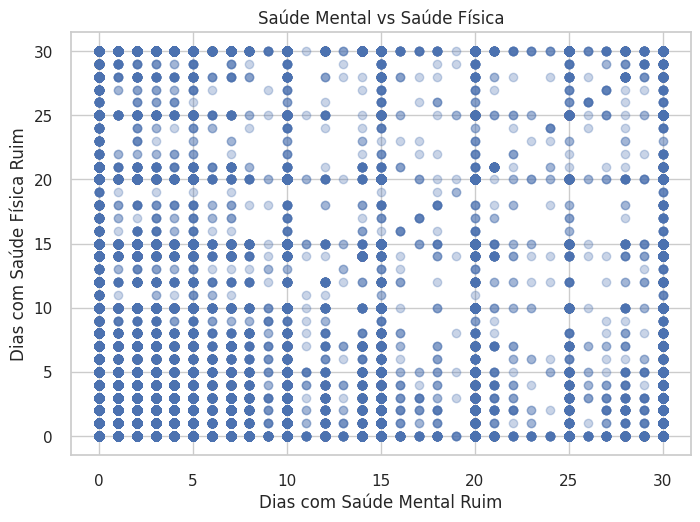

In [33]:
plt.scatter(df_raw["MentHlth"], df_raw["PhysHlth"], alpha=0.3)
plt.title("Saúde Mental vs Saúde Física")
plt.xlabel("Dias com Saúde Mental Ruim")
plt.ylabel("Dias com Saúde Física Ruim")
plt.show()

#### Renda × Diabetes (Gráfico de Barras Agrupadas)

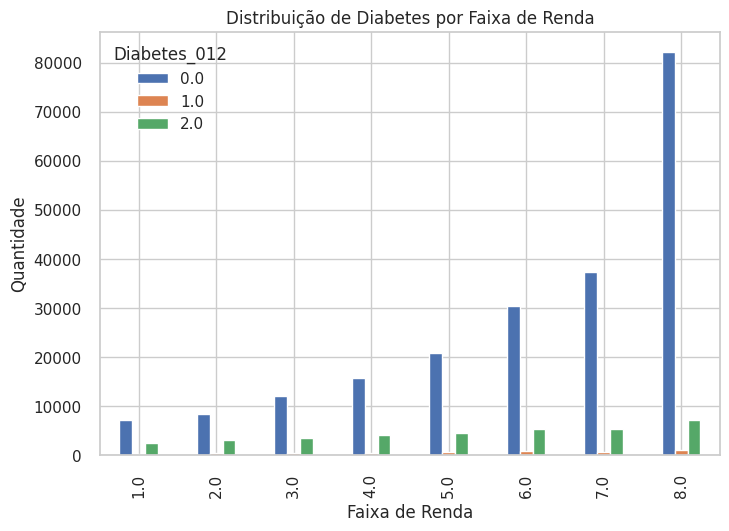

In [34]:
pd.crosstab(
    df_raw["Income"],
    df_raw["Diabetes_012"]
).plot(kind="bar")

plt.title("Distribuição de Diabetes por Faixa de Renda")
plt.xlabel("Faixa de Renda")
plt.ylabel("Quantidade")
plt.show()


#### Correlação Global (Mapa de Calor)

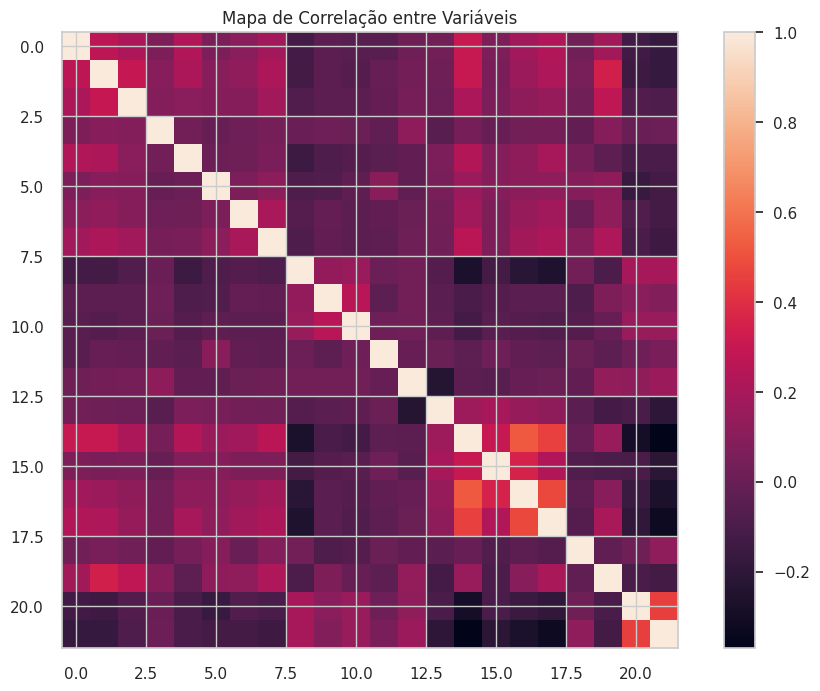

In [35]:
corr = df_raw.corr()

plt.figure(figsize=(12,8))
plt.imshow(corr)
plt.colorbar()
plt.title("Mapa de Correlação entre Variáveis")
plt.show()
